                             PROJET 3 
                 Concevez une application au service de la santé publique

# I - Chargement des packages

In [1]:
# Importation des packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# II - Chargement du jeu de données

In [2]:
# Importation du jeu de données
data = pd.read_csv('/Users/Leila/Documents/OpenClassRooms/P3/fr.openfoodfacts.org.products.csv', sep='\t',na_values=['NaT','nan'],low_memory=False)
datafood = data.copy()
pd.options.display.max_columns = None
datafood.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

# III - Structure du jeu de données

In [3]:
def Jeudedonnée(data):
    # Taille : nombre de lignes/colonnes
    nRow, nCol = data.shape
    # Nbres de valeurs manquantes
    Nbresvm = data.isnull().sum().sum()
    Vvm=sb.heatmap(data.isnull(), yticklabels=False, cbar=False )
    # Taux de valeurs manquantes
    T = (data.isnull().sum() /len(data))*100
    TVM=(T.sum()/data.shape[1]).round()
    # Identification des doublons
    Db=data.duplicated().sum()
    # Taux de doublons
    TD = (data.duplicated().sum() /len(data))*100
    TTD=(TD.sum()/data.shape[1]).round()
    
    
    print('\n            Structure du jeu de données \n')
    print('Nombre d observations        : ', nRow)
    print('Nombre de variables          : ', nCol)
    print('Nombre de valeurs manquantes : ', Nbresvm)
    print('Taux de Valeurs manquantes   : ', TVM,'%')
    print('Nombre de valeurs dupliquées : ', Db)
    print('Taux de valeurs dupliquées   : ', TTD,'%\n')
    print('\nNombre de type de variable :')
    print(data.dtypes.value_counts(),'\n')
    print( Vvm)
    print(' \n    Visualisation des valeurs manquantes : \n')
    print(" Couleurs :   ")
    print("     Beige - valeurs manquantes ")      
    print("     Noir - valeurs présentes ")


            Structure du jeu de données 

Nombre d observations        :  320772
Nombre de variables          :  162
Nombre de valeurs manquantes :  39608589
Taux de Valeurs manquantes   :  76.0 %
Nombre de valeurs dupliquées :  0
Taux de valeurs dupliquées   :  0.0 %


Nombre de type de variable :
float64    106
object      56
dtype: int64 

AxesSubplot(0.125,0.11;0.775x0.77)
 
    Visualisation des valeurs manquantes : 

 Couleurs :   
     Beige - valeurs manquantes 
     Noir - valeurs présentes 


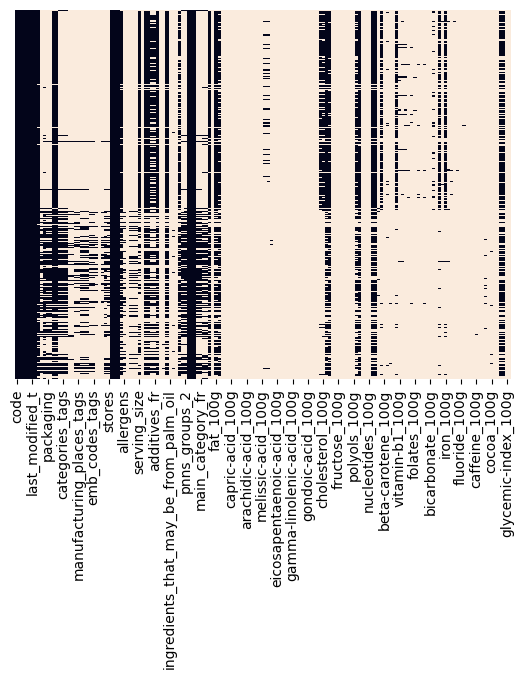

In [4]:
Jeudedonnée(datafood)

In [5]:
def Statistiquesdonnées(data):
    SDQT=data.describe(include= np.number)
    SDQL=data.describe(exclude= np.number)
    
    print("\n Statistique descriptive des variables quantitatives\n\n")
    print( SDQT,"\n")
    print("\n\n\n Statistique descriptive des variables qualitatives\n\n")
    print( SDQL,"\n")

In [6]:
Statistiquesdonnées(datafood)


 Statistique descriptive des variables quantitatives


       no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                    

# IV - Structure du jeu de données après le pré-nettoyage

In [7]:
def Jeudedonnéepréclean(data):
    # Suppression de colonnes avec que des valeurs manquantes
    data.dropna(how='all',axis=1,inplace=True)
    # Suppression de ligne avec que des valeurs manquantes
    data.dropna(how='all',inplace=True)
    
    #Suppression des colonnes superieur à 90% de valeurs manquantes
    data=data[data.columns[data.isnull().sum() /len(data) <0.9]]
    
    # Taille : nombre de lignes/colonnes
    nRow, nCol = data.shape
    # Nbres de valeurs manquantes
    Nbresvm = data.isnull().sum().sum()
    Vvm=sb.heatmap(data.isnull(), yticklabels=False, cbar=False )
    # Taux de valeurs manquantes
    T = (data.isnull().sum() /len(data))*100
    TVM=(T.sum()/data.shape[1]).round()
    # Identification des doublons
    Db=data.duplicated().sum()
    # Taux de doublons
    TD = (data.duplicated().sum() /len(data))*100
    TTD=(TD.sum()/data.shape[1]).round()
    
    
    print('\n      Structure du jeu de données après le pré-nettoyage\n')
    print('......Suppression de colonnes avec que des valeurs manquantes...... ')
    print('......Suppression de ligne avec que des valeurs manquantes...... \n')
    print('\n......Suppression des colonnes superieur à 90% de valeurs manquantes...... \n')
    print('Nombre d observations        : ', nRow)
    print('Nombre de variables          : ', nCol)
    print('Nombre de valeurs manquantes : ', Nbresvm)
    print('Taux de Valeurs manquantes   : ', TVM,'%')
    print('Nombre de valeurs dupliquées : ', Db)
    print('Taux de valeurs dupliquées   : ', TTD,'%\n')
    print('\nNombre de type de variable :')
    print(data.dtypes.value_counts(),'\n')
    print( Vvm)
    print(' \n    Visualisation des valeurs manquantes : \n')
    print(" Couleurs :   ")
    print("     Beige - valeurs manquantes ")      
    print("     Noir - valeurs non-manquantes ")


      Structure du jeu de données après le pré-nettoyage

......Suppression de colonnes avec que des valeurs manquantes...... 
......Suppression de ligne avec que des valeurs manquantes...... 


......Suppression des colonnes superieur à 90% de valeurs manquantes...... 

Nombre d observations        :  320772
Nombre de variables          :  62
Nombre de valeurs manquantes :  7961987
Taux de Valeurs manquantes   :  40.0 %
Nombre de valeurs dupliquées :  0
Taux de valeurs dupliquées   :  0.0 %


Nombre de type de variable :
object     42
float64    20
dtype: int64 

AxesSubplot(0.125,0.11;0.775x0.77)
 
    Visualisation des valeurs manquantes : 

 Couleurs :   
     Beige - valeurs manquantes 
     Noir - valeurs non-manquantes 


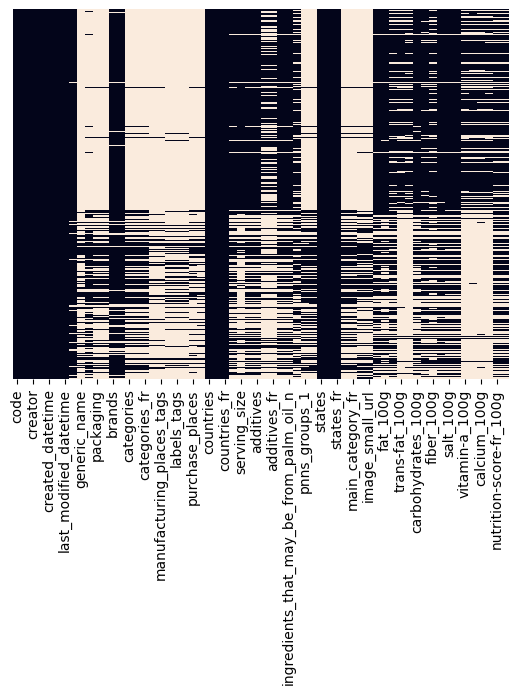

In [8]:
Jeudedonnéepréclean(datafood)

In [9]:
# Nbres d'articles vendus dans chaque pays
# Répartition du nutriscore dans chacun des pays

# V - Sélection de données pertinentes pour l'application

In [10]:
Selectdatafood=datafood.iloc[:,[7,9,12,16,33,40,49,59,60,61,62,88,89,99,103]]
Selectdatafood.head()
#7,9,12,16,33,40,49,59,61,62,87,88,98,102
#Select = datafood["product_name","quantity","brands","categories","countries_fr","serving_size","nutrition_grade_fr","energy_100g","carbohydrates_100g","sugars_100g","fat_100g","saturated-fat_100g","proteins_100g","salt_100g"]

,product_name,quantity,brands,categories_fr,countries_fr,serving_size,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,Farine de blé noir,1kg,Ferme t'y R'nao,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,États-Unis,28 g (1 ONZ),d,2243.0,NaN,28.57,28.57,64.29,14.29,3.57,0.00000
2,Peanuts,NaN,Torn & Glasser,NaN,États-Unis,28 g (0.25 cup),b,1941.0,NaN,17.86,0.00,60.71,17.86,17.86,0.63500
3,Organic Salted Nut Mix,NaN,Grizzlies,NaN,États-Unis,28 g (0.25 cup),d,2540.0,NaN,57.14,5.36,17.86,3.57,17.86,1.22428
4,Organic Polenta,NaN,Bob's Red Mill,NaN,États-Unis,35 g (0.25 cup),NaN,1552.0,NaN,1.43,NaN,77.14,NaN,8.57,NaN


# VI - Nettoyage du jeu de données

## 1. Traitement des doublons

In [11]:
def suppDoublons(data):
    nRow, nCol=data.shape
    doub=data.duplicated().sum()
    suppdoub=data.drop_duplicates(keep='first',inplace=True)
    nnRow, nnCol=data.shape
    
    print('\n           Traitement des doublons\n') 
    print('\nTaille du jeu de données avant: ',nRow,",",nCol)
    print('\nIdentification des doublons  : ', doub)
    print('\n ......Suppression des doublons sauf la premiére ligne...... \n') 
    print('Taille du jeu de données après: ',nnRow,",",nnCol,'\n')

#Selectdatafood.loc[Selectdatafood.duplicated()].tail()

In [12]:
suppDoublons(Selectdatafood)


           Traitement des doublons


Taille du jeu de données avant:  320772 , 15

Identification des doublons  :  19368

 ......Suppression des doublons sauf la premiére ligne...... 

Taille du jeu de données après:  301404 , 15 



/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/309039359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suppdoub=data.drop_duplicates(keep='first',inplace=True)


## 2. Détection de valeurs aberrantes

### A. Visualisation des données

In [13]:
def boxplot(data):
    plt.figure(figsize = (8,6))
    sb.boxplot(data=data,orient="h")
    plt.grid()

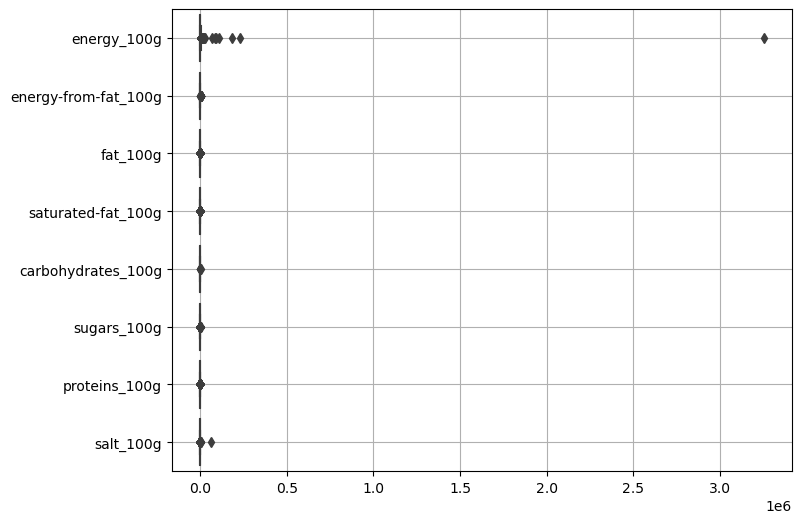

In [14]:
boxplot(Selectdatafood)

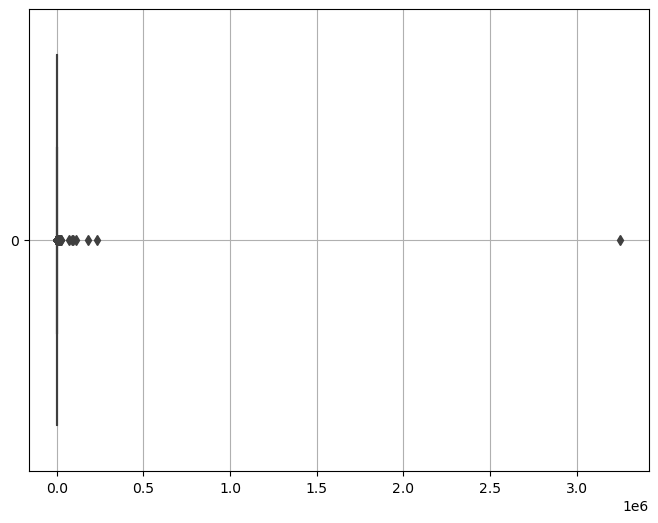

In [15]:
boxplot(Selectdatafood['energy_100g'])

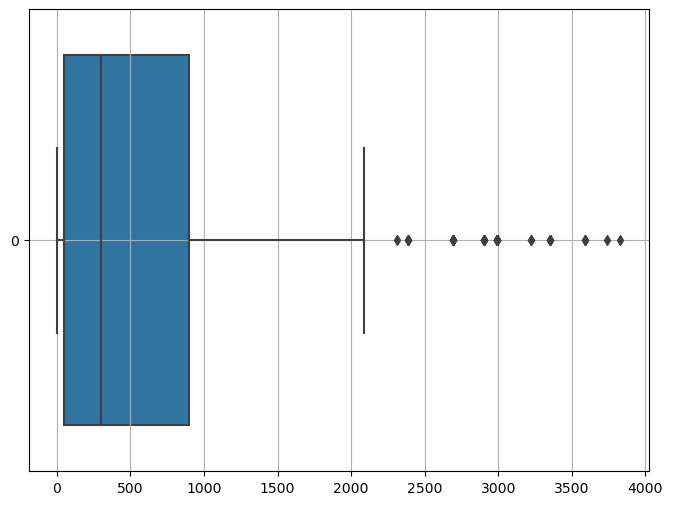

In [16]:
boxplot(Selectdatafood['energy-from-fat_100g'])

### B. Extraction des colonnes à traiter

In [17]:
features=['energy_100g','energy-from-fat_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']
featuress=['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g']

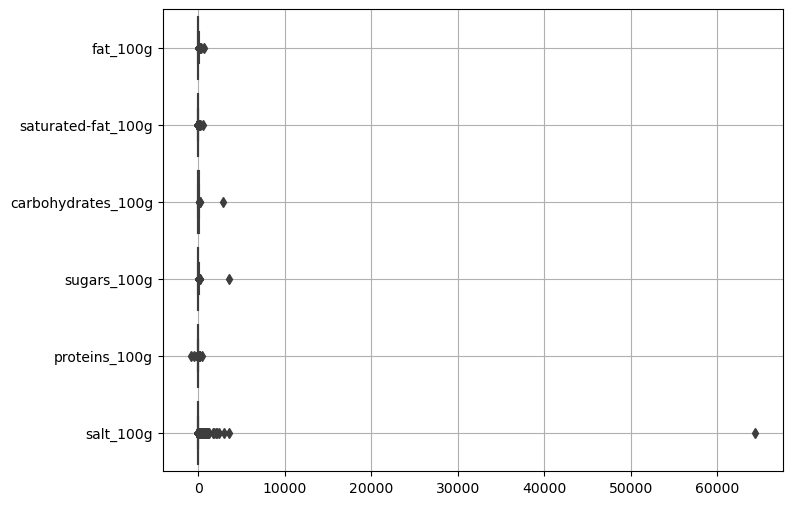

In [18]:
boxplot(Selectdatafood[featuress])

### C. Dispersions des variables quantitatives

In [19]:
Selectdatafood.describe().round()

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
count,255030.0,857.0,237826.0,224834.0,237524.0,239659.0,253848.0,249457.0
mean,1143.0,586.0,13.0,5.0,32.0,16.0,7.0,2.0
std,6522.0,713.0,17.0,8.0,30.0,22.0,8.0,130.0
min,0.0,0.0,0.0,0.0,0.0,-18.0,-800.0,0.0
25%,381.0,49.0,0.0,0.0,6.0,1.0,1.0,0.0
50%,1100.0,300.0,5.0,2.0,21.0,6.0,5.0,1.0
75%,1674.0,898.0,20.0,7.0,58.0,24.0,10.0,1.0
max,3251373.0,3830.0,714.0,550.0,2917.0,3520.0,430.0,64313.0


### D. Suppression des lignes contenant des valeurs aberrantes

In [20]:
def intervalles(data,feature):
    for feature in feature:
        data.drop(data[data[feature] < 0 ].index, inplace=True)
        data.drop(data[data[feature] > 100 ].index, inplace=True)

In [21]:
intervalles(Selectdatafood,featuress)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/4185464806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data[feature] < 0 ].index, inplace=True)
/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/4185464806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data[feature] > 100 ].index, inplace=True)


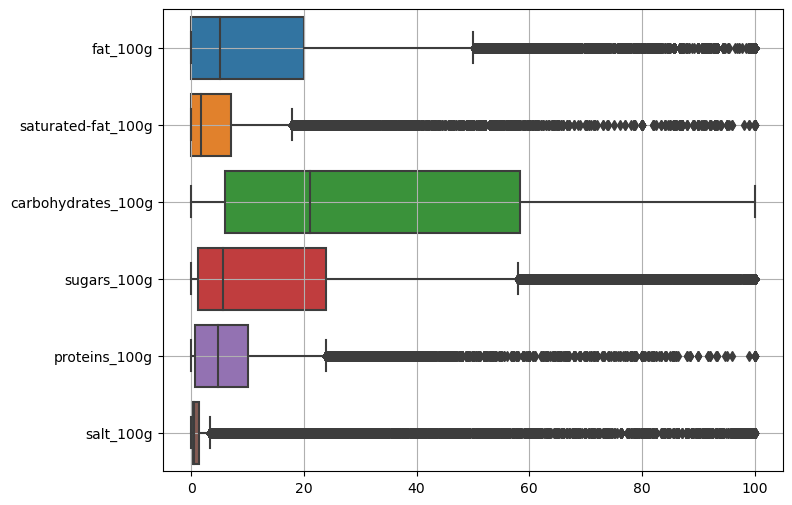

In [22]:
boxplot(Selectdatafood[featuress])

In [23]:
Selectdatafood.drop(Selectdatafood[Selectdatafood['energy_100g'] > 3700 ].index, inplace=True)
Selectdatafood.drop(Selectdatafood[Selectdatafood['energy-from-fat_100g'] > 900 ].index, inplace=True)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/258447217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.drop(Selectdatafood[Selectdatafood['energy_100g'] > 3700 ].index, inplace=True)
/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/258447217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood.drop(Selectdatafood[Selectdatafood['energy-from-fat_100g'] > 900 ].index, inplace=True)


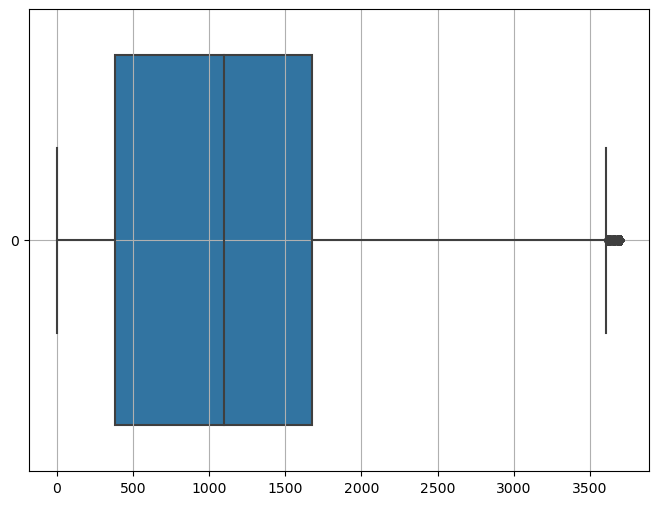

In [24]:
boxplot(Selectdatafood['energy_100g'])

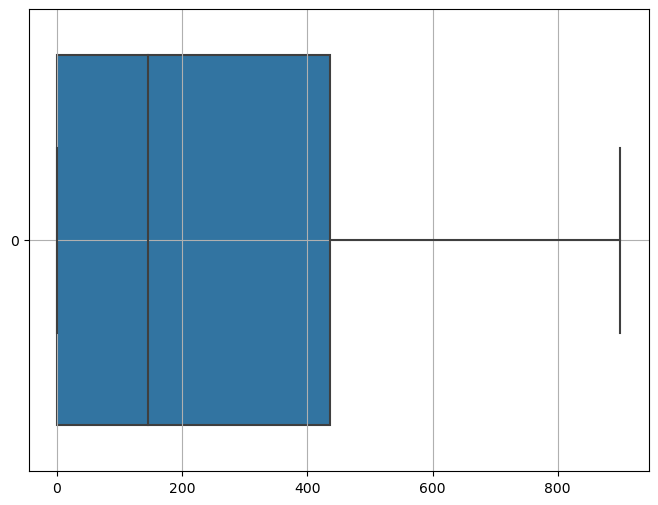

In [25]:
boxplot(Selectdatafood['energy-from-fat_100g'])

In [26]:
Selectdatafood.describe()

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
count,254029.000000,645.000000,237013.000000,223967.000000,236732.000000,238936.000000,252883.000000,248494.000000
mean,1118.509926,255.879132,12.531788,5.066036,32.170141,15.925591,7.119801,1.590461
std,783.771692,276.643376,16.948478,7.717677,29.067658,21.058025,8.136772,6.217171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,381.000000,0.000000,0.000000,0.000000,6.120000,1.320000,0.710000,0.063500
50%,1100.000000,145.000000,5.000000,1.790000,21.000000,5.710000,4.820000,0.589280
75%,1674.000000,437.000000,20.000000,7.140000,58.400000,24.000000,10.000000,1.379220
max,3700.000000,900.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## 3. Traitement des valeurs manquantes

### A) Identification des valeurs manquantes

In [27]:
def valmanquantes(data):
    nRow,nCol=data.shape
    #Nbres de valeurs manquantes
    nvm=data.isnull().sum().sum()
    #Nbres de valeurs manquantes par colonnes
    nvmc=data.isnull().sum().sort_values(ascending=True)
    #Taux de valeurs manquantes
    T=((data.isnull().sum() /len(data))*100)
    Tvm=(T.sum()/data.shape[1]).round()
    #Taux de valeurs manquantes par colonnes
    Tvmc=((data.isnull().sum() /len(data))*100).sort_values(ascending=True)
    # Suppression de colonnes avec que des valeurs manquantes
    data.dropna(how='all',axis=1,inplace=True)
    # Suppression de ligne avec que des valeurs manquantes
    data.dropna(how='all',inplace=True)
    nRow,nCol=data.shape
    
    print('\nTaille du jeu de données avant: ',nRow,",",nCol)
    print('\nNombres de valeurs manquantes: ',nvm)
    print('\nTaux de valeurs manquantes: ',Tvm,'%')
    print('\nTaux de valeurs manquantes par colonnes: \n')
    print(Tvmc)
    print('\nNombres de valeurs manquantes par colonnes en %: \n')
    print(nvmc)
    print('\n......Suppression de colonnes avec que des valeurs manquantes...... ')
    print('......Suppression de ligne avec que des valeurs manquantes...... ')
    print('\nTaille du jeu de données après: ',nRow,",",nCol)
    print(sb.heatmap(data.isnull(), yticklabels=False, cbar=False ))
    print(' \n    Visualisation des valeurs manquantes : \n')
    print(" Couleurs :   ")
    print("     Beige - valeurs manquantes ")      
    print("     Noir - valeurs non-manquantes ")

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/761641260.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',axis=1,inplace=True)
/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/761641260.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',inplace=True)



Taille du jeu de données avant:  300398 , 15

Nombres de valeurs manquantes:  1324019

Taux de valeurs manquantes:  29.0 %

Taux de valeurs manquantes par colonnes: 

countries_fr             0.080227
product_name             1.583561
brands                   5.294625
energy_100g             15.436137
proteins_100g           15.817629
salt_100g               17.278686
sugars_100g             20.460454
fat_100g                21.100603
carbohydrates_100g      21.194145
saturated-fat_100g      25.443493
nutrition_grade_fr      27.996764
serving_size            31.901238
quantity                65.295157
categories_fr           72.085460
energy-from-fat_100g    99.785286
dtype: float64

Nombres de valeurs manquantes par colonnes en %: 

countries_fr               241
product_name              4757
brands                   15905
energy_100g              46370
proteins_100g            47516
salt_100g                51905
sugars_100g              61463
fat_100g                 63386
carbohy

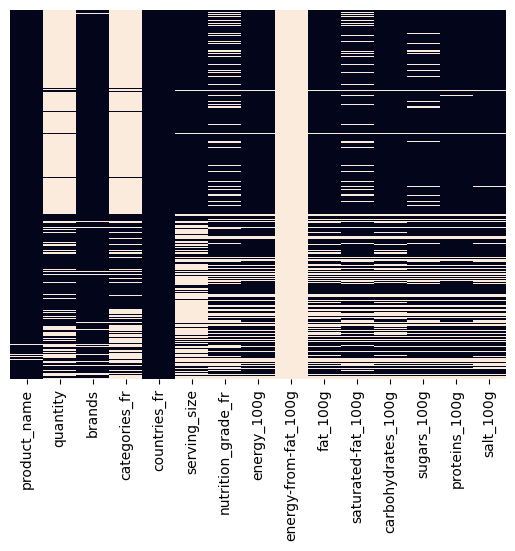

In [28]:
valmanquantes(Selectdatafood)

### B) Remplacer par la moyenne

In [29]:
fmean=['carbohydrates_100g','saturated-fat_100g','proteins_100g']

In [30]:
def remplmean(data,feature):
    mean = data[feature].mean()
    data[feature].fillna(mean,inplace=True)

In [31]:
for feature in fmean:
    remplmean(Selectdatafood,feature)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/3878033064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature].fillna(mean,inplace=True)


### C) Remplacer par la mediane

In [32]:
fmedian=['energy_100g','energy-from-fat_100g','fat_100g','sugars_100g']

In [33]:
def remplmedian(data,feature):
    median = data[feature].median()
    data[feature].fillna(median,inplace=True)

In [34]:
for feature in fmedian:
    remplmedian(Selectdatafood,feature)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/167195384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature].fillna(median,inplace=True)


### D) Remplacer par 0

In [35]:
Selectdatafood['salt_100g'].fillna(0, inplace=True)

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/2756776613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Selectdatafood['salt_100g'].fillna(0, inplace=True)


### E) Visualisation du jeu de données après traitement des valeurs manquantes

/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/761641260.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',axis=1,inplace=True)
/var/folders/ll/wwjlvhbx62s8q5t2qm4f0dvh0000gn/T/ipykernel_7644/761641260.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all',inplace=True)



Taille du jeu de données avant:  300398 , 15

Nombres de valeurs manquantes:  613519

Taux de valeurs manquantes:  14.0 %

Taux de valeurs manquantes par colonnes: 

energy_100g              0.000000
energy-from-fat_100g     0.000000
fat_100g                 0.000000
saturated-fat_100g       0.000000
carbohydrates_100g       0.000000
sugars_100g              0.000000
proteins_100g            0.000000
salt_100g                0.000000
countries_fr             0.079894
product_name             1.583233
brands                   5.294310
nutrition_grade_fr      27.996525
serving_size            31.901011
quantity                65.295042
categories_fr           72.085367
dtype: float64

Nombres de valeurs manquantes par colonnes en %: 

energy_100g                  0
energy-from-fat_100g         0
fat_100g                     0
saturated-fat_100g           0
carbohydrates_100g           0
sugars_100g                  0
proteins_100g                0
salt_100g                    0
countrie

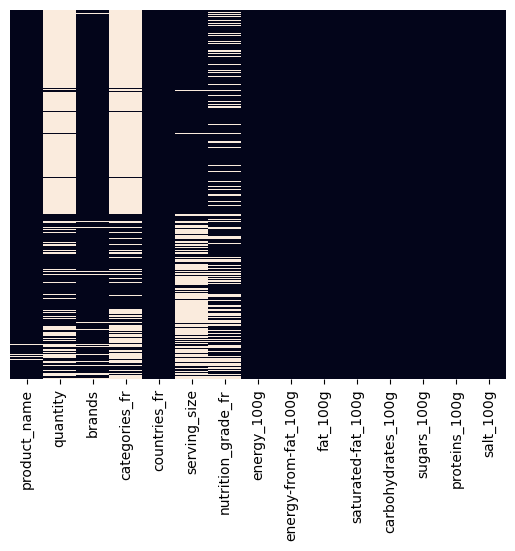

In [36]:
valmanquantes(Selectdatafood)

In [37]:
Selectdatafood.describe(include='all')

,product_name,quantity,brands,categories_fr,countries_fr,serving_size,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
count,295642,104253,284494,83855,300158,204568,216297,300398.000000,300398.000000,300398.000000,300398.000000,300398.000000,300398.000000,300398.000000,300398.000000
unique,220700,13737,58591,21094,720,25309,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ice Cream,500 g,Carrefour,"Snacks sucrés,Biscuits et gâteaux,Biscuits",États-Unis,240 ml (8 fl oz),d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,401,4639,2967,800,166085,5225,61395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1115.652761,145.238074,10.942555,5.066036,32.170141,13.835461,7.119801,1.315655
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.777576,13.798967,15.365023,6.663921,25.804165,19.227447,7.465576,5.686482
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,477.000000,145.000000,0.800000,0.200000,9.170000,2.330000,1.500000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.000000,145.000000,5.000000,5.000000,32.170141,5.710000,6.670000,0.243840
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1586.000000,145.000000,15.097500,5.066036,50.200000,16.300000,8.700000,1.178560
